[*********************100%***********************]  1 of 1 completed
Total Instances: 4193
Positive Instances: 1081
Negative Instances: 688
+ve Alpha Instances: 688
-ve Alpha Instances: 1081
Average Returns (5 days): -2.5338719476744176
Average Returns (21 days): -7.104688081395351
Average Returns (42 days): -2.310439212827992
Average Returns (63 days): -1.366389795918368


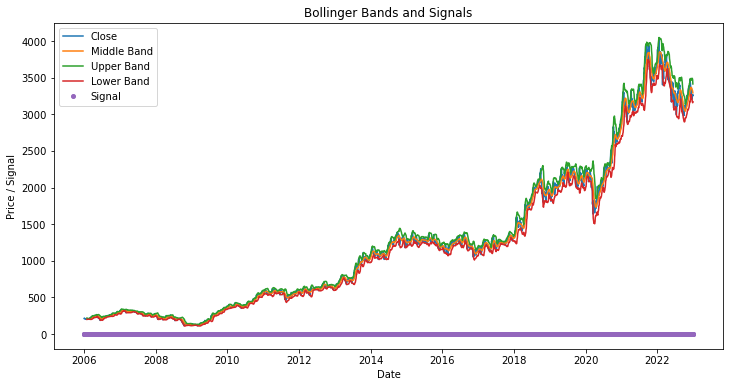

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical stock data for TCS
symbol = "TCS.NS"
start_date = "2006-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate Bollinger Bands
window = 20
data['Middle_Band'] = data['Close'].rolling(window=window).mean()
data['Upper_Band'] = data['Middle_Band'] + 2 * data['Close'].rolling(window=window).std()
data['Lower_Band'] = data['Middle_Band'] - 2 * data['Close'].rolling(window=window).std()

# Calculate forward returns
for period in [5, 21, 42, 63]:
    data[f'Fwd_{period}d_Return'] = data['Close'].pct_change(periods=period)

# Calculate Stop Loss performance
data['SL_Return'] = np.where(data['Close'] < data['Middle_Band'], -data['Close'].pct_change(), 0)

# Convert returns into 2 units and decimals
data['Fwd_5d_Return'] = (data['Fwd_5d_Return'] * 200).round(4)
data['Fwd_21d_Return'] = (data['Fwd_21d_Return'] * 200).round(4)
data['Fwd_42d_Return'] = (data['Fwd_42d_Return'] * 200).round(4)
data['Fwd_63d_Return'] = (data['Fwd_63d_Return'] * 200).round(4)

# Correct positive and negative alpha instances
data['Positive_Alpha'] = np.where((data['SL_Return'] < 0) & (data['SL_Return'] != 0), 1, 0)
data['Negative_Alpha'] = np.where((data['SL_Return'] > 0) & (data['SL_Return'] != 0), 1, 0)
positive_alpha_instances = data['Positive_Alpha'].sum()
negative_alpha_instances = data['Negative_Alpha'].sum()

# Calculate average returns for different forward periods
avg_returns_5d = data[data['Positive_Alpha'] == 1]['Fwd_5d_Return'].mean()
avg_returns_21d = data[data['Positive_Alpha'] == 1]['Fwd_21d_Return'].mean()
avg_returns_42d = data[data['Positive_Alpha'] == 1]['Fwd_42d_Return'].mean()
avg_returns_63d = data[data['Positive_Alpha'] == 1]['Fwd_63d_Return'].mean()

# Print the metrics
print("Total Instances:", len(data))
print("Positive Instances:", len(data[data['SL_Return'] > 0]))
print("Negative Instances:", len(data[data['SL_Return'] < 0]))
print("+ve Alpha Instances:", positive_alpha_instances)
print("-ve Alpha Instances:", negative_alpha_instances)
print("Average Returns (5 days):", avg_returns_5d)
print("Average Returns (21 days):", avg_returns_21d)
print("Average Returns (42 days):", avg_returns_42d)
print("Average Returns (63 days):", avg_returns_63d)

# Plot Bollinger Bands and signals
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['Middle_Band'], label='Middle Band')
plt.plot(data.index, data['Upper_Band'], label='Upper Band')
plt.plot(data.index, data['Lower_Band'], label='Lower Band')
plt.plot(data.index, data['Positive_Alpha'], marker='o', linestyle='', label='Signal', markersize=4)
plt.legend()
plt.title('Bollinger Bands and Signals')
plt.xlabel('Date')
plt.ylabel('Price / Signal')
plt.show()


[*********************100%***********************]  1 of 1 completed
Total Instances: 4193
Positive Instances: 1059
Negative Instances: 704
+ve Alpha Instances: 704
-ve Alpha Instances: 1059
Average Returns (5 days): -2.179971306818182
Average Returns (21 days): -7.202428876244672
Average Returns (42 days): -1.8355131241084193
Average Returns (63 days): -0.7779847360913004


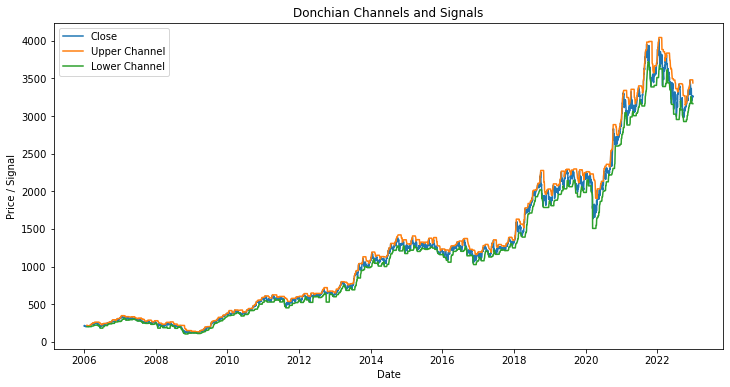

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical stock data for TCS
symbol = "TCS.NS"
start_date = "2006-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Define the Donchian Channel parameters
window = 20  # Look-back window for calculating Donchian Channels

# Calculate Donchian Channels
data['Upper_Channel'] = data['High'].rolling(window=window).max()
data['Lower_Channel'] = data['Low'].rolling(window=window).min()
data['Middle_Channel'] = (data['Upper_Channel'] + data['Lower_Channel']) / 2

# Calculate forward returns
for period in [5, 21, 42, 63]:
    data[f'Fwd_{period}d_Return'] = data['Close'].pct_change(periods=period)

# Calculate Stop Loss performance (if needed)
data['SL_Return'] = np.where(data['Close'] < data['Middle_Channel'], -data['Close'].pct_change(), 0)

# Convert returns into 2 units and decimals
data['Fwd_5d_Return'] = (data['Fwd_5d_Return'] * 200).round(4)
data['Fwd_21d_Return'] = (data['Fwd_21d_Return'] * 200).round(4)
data['Fwd_42d_Return'] = (data['Fwd_42d_Return'] * 200).round(4)
data['Fwd_63d_Return'] = (data['Fwd_63d_Return'] * 200).round(4)

# Correct positive and negative alpha instances (if needed)
data['Positive_Alpha'] = np.where((data['SL_Return'] < 0) & (data['SL_Return'] != 0), 1, 0)
data['Negative_Alpha'] = np.where((data['SL_Return'] > 0) & (data['SL_Return'] != 0), 1, 0)
positive_alpha_instances = data['Positive_Alpha'].sum()
negative_alpha_instances = data['Negative_Alpha'].sum()

# Calculate average returns for different forward periods (if needed)
avg_returns_5d = data[data['Positive_Alpha'] == 1]['Fwd_5d_Return'].mean()
avg_returns_21d = data[data['Positive_Alpha'] == 1]['Fwd_21d_Return'].mean()
avg_returns_42d = data[data['Positive_Alpha'] == 1]['Fwd_42d_Return'].mean()
avg_returns_63d = data[data['Positive_Alpha'] == 1]['Fwd_63d_Return'].mean()

# Print the metrics (if needed)
print("Total Instances:", len(data))
print("Positive Instances:", len(data[data['SL_Return'] > 0]))
print("Negative Instances:", len(data[data['SL_Return'] < 0]))
print("+ve Alpha Instances:", positive_alpha_instances)
print("-ve Alpha Instances:", negative_alpha_instances)
print("Average Returns (5 days):", avg_returns_5d)
print("Average Returns (21 days):", avg_returns_21d)
print("Average Returns (42 days):", avg_returns_42d)
print("Average Returns (63 days):", avg_returns_63d)

# Plot Donchian Channels and signals (if needed)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['Upper_Channel'], label='Upper Channel')
plt.plot(data.index, data['Lower_Channel'], label='Lower Channel')
# Add signal plotting here if needed
plt.legend()
plt.title('Donchian Channels and Signals')
plt.xlabel('Date')
plt.ylabel('Price / Signal')
plt.show()


[*********************100%***********************]  1 of 1 completed
Total Instances: 4193
Positive Instances: 1106
Negative Instances: 626
+ve Alpha Instances: 626
-ve Alpha Instances: 1106
Average Returns (5 days): -3.1955961661341847
Average Returns (21 days): -8.290770000000002
Average Returns (42 days): -5.519537540453064
Average Returns (63 days): -4.860934627831711


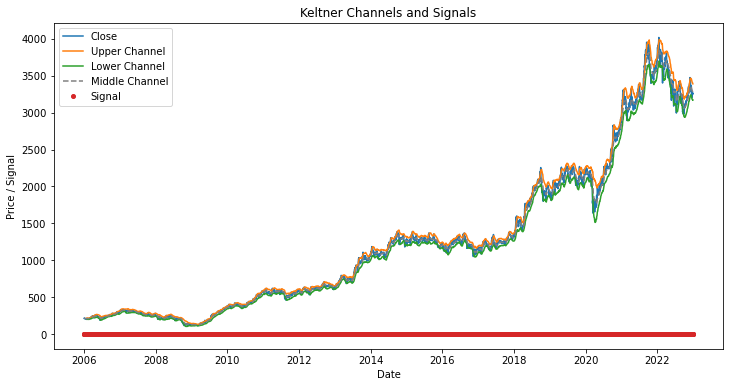

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical stock data for TCS
symbol = "TCS.NS"
start_date = "2006-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Define the Keltner Channel parameters
window = 20  # Look-back window for calculating the Average True Range (ATR)
multiplier = 2  # Multiplier for the ATR

# Calculate Average True Range (ATR) using the entire dataset
data['High_Low_Diff'] = data['High'] - data['Low']
data['High_Close_Diff'] = abs(data['High'] - data['Close'].shift(1))
data['Low_Close_Diff'] = abs(data['Low'] - data['Close'].shift(1))
data['TR'] = data[['High_Low_Diff', 'High_Close_Diff', 'Low_Close_Diff']].max(axis=1)
data['ATR'] = data['TR'].rolling(window=window).mean()

# Calculate 20-day Exponential Moving Average (EMA)
data['Middle_Channel'] = data['Close'].ewm(span=20, adjust=False).mean()

# Calculate Keltner Channels
data['Upper_Channel'] = data['Middle_Channel'] + (data['ATR'] * multiplier)
data['Lower_Channel'] = data['Middle_Channel'] - (data['ATR'] * multiplier)

# Calculate forward returns
for period in [5, 21, 42, 63]:
    data[f'Fwd_{period}d_Return'] = data['Close'].pct_change(periods=period)

# Calculate Stop Loss performance (placing stop loss at the middle channel)
data['SL_Return'] = np.where(data['Close'] < data['Middle_Channel'], -data['Close'].pct_change(), 0)

# Convert returns into 2 units and decimals
data['Fwd_5d_Return'] = (data['Fwd_5d_Return'] * 200).round(4)
data['Fwd_21d_Return'] = (data['Fwd_21d_Return'] * 200).round(4)
data['Fwd_42d_Return'] = (data['Fwd_42d_Return'] * 200).round(4)
data['Fwd_63d_Return'] = (data['Fwd_63d_Return'] * 200).round(4)

# Correct positive and negative alpha instances
data['Positive_Alpha'] = np.where((data['SL_Return'] < 0) & (data['SL_Return'] != 0), 1, 0)
data['Negative_Alpha'] = np.where((data['SL_Return'] > 0) & (data['SL_Return'] != 0), 1, 0)
positive_alpha_instances = data['Positive_Alpha'].sum()
negative_alpha_instances = data['Negative_Alpha'].sum()

# Calculate average returns for different forward periods
avg_returns_5d = data[data['Positive_Alpha'] == 1]['Fwd_5d_Return'].mean()
avg_returns_21d = data[data['Positive_Alpha'] == 1]['Fwd_21d_Return'].mean()
avg_returns_42d = data[data['Positive_Alpha'] == 1]['Fwd_42d_Return'].mean()
avg_returns_63d = data[data['Positive_Alpha'] == 1]['Fwd_63d_Return'].mean()

# Print the metrics
print("Total Instances:", len(data))
print("Positive Instances:", len(data[data['SL_Return'] > 0]))
print("Negative Instances:", len(data[data['SL_Return'] < 0]))
print("+ve Alpha Instances:", positive_alpha_instances)
print("-ve Alpha Instances:", negative_alpha_instances)
print("Average Returns (5 days):", avg_returns_5d)
print("Average Returns (21 days):", avg_returns_21d)
print("Average Returns (42 days):", avg_returns_42d)
print("Average Returns (63 days):", avg_returns_63d)

# Plot Keltner Channels and signals
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['Upper_Channel'], label='Upper Channel')
plt.plot(data.index, data['Lower_Channel'], label='Lower Channel')
plt.plot(data.index, data['Middle_Channel'], label='Middle Channel', linestyle='--', color='gray')
plt.plot(data.index, data['Positive_Alpha'], marker='o', linestyle='', label='Signal', markersize=4)
plt.legend()
plt.title('Keltner Channels and Signals')
plt.xlabel('Date')
plt.ylabel('Price / Signal')
plt.show()
